<h1>Introduction</h1>
Oily Giant is looking to maximize profit by finding the best region to place their new well. This project utilizes machine learning and the bootstrapping technique in order to help them make the best possible decision in order to do so.

Import statements necessary to complete the task

In [377]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression	
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve
plt.style.use('ggplot')

Importing the data

In [378]:
geo_data_0 = pd.read_csv('/Users/leahdeyoung/Desktop/GitHub/oily-giant-tripleten/geo_data_0.csv', encoding = "utf-8")
geo_data_1 = pd.read_csv('/Users/leahdeyoung/Desktop/GitHub/oily-giant-tripleten/geo_data_1.csv', encoding = "utf-8")
geo_data_2 = pd.read_csv('/Users/leahdeyoung/Desktop/GitHub/oily-giant-tripleten/geo_data_2.csv', encoding = "utf-8")


FileNotFoundError: [Errno 2] No such file or directory: '/datasets/geo_data_0.csv'

This code looks at a sample of the data and basic information about the data

In [ ]:
display(geo_data_0.sample(10))
geo_data_0.info()

,id,f0,f1,f2,product
27980,v76i1,-0.302658,0.805206,-1.808799,81.660612
1476,kmz4W,1.007540,0.457895,5.067778,124.470652
73748,prtRJ,-0.012513,0.852260,-1.383608,56.105604
34629,hqR19,0.929535,0.519450,4.495964,101.060873
35685,JNvn4,0.820278,-0.479137,3.758625,143.612770
27905,3asIC,-0.703305,0.415916,0.690313,56.548494
20221,TANWk,1.103555,0.221890,2.773347,110.664541
53832,GclG6,1.825388,0.243301,4.181668,71.915305
81952,vXex7,0.866522,0.159956,2.982257,137.307398
40108,P12fp,0.630238,-0.266036,3.298075,73.478291


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
display(geo_data_1.sample(10))
geo_data_1.info()

,id,f0,f1,f2,product
93547,Py1cr,6.657670,-12.623240,0.003708,0.000000
79635,Ef1gk,-12.765320,-13.659437,1.992642,57.085625
85345,slTTk,2.127362,-11.779792,0.006530,0.000000
38887,lt6Ps,17.756255,-4.621991,3.008455,80.859783
66061,2rGu9,16.365986,-6.213717,4.991106,134.766305
41007,KCtI5,-6.007513,-17.304672,-0.002812,3.179103
80620,D2CMg,0.333285,-2.767916,5.005056,137.945408
31646,N5lo8,-8.465718,-9.743832,4.998092,137.945408
40663,7zRC6,5.805467,-14.414755,1.996542,57.085625
83019,OIsrC,-4.868408,1.771347,2.995836,84.038886


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
display(geo_data_2.sample(10))
geo_data_2.info()

,id,f0,f1,f2,product
48208,HehCW,0.180770,-1.427958,-2.216626,89.079998
57538,p4MVh,-0.183105,-1.628012,8.219719,148.865307
49260,eVzF8,-1.451356,-1.638539,-1.090485,108.109825
15503,vGdGI,-0.884453,-3.898860,7.841443,174.682085
27784,HbdRG,1.480040,0.983049,0.013138,39.293892
88075,ALTWz,-3.811525,-3.673477,2.615942,77.789353
29458,J9djz,0.613414,-0.137799,-3.428069,38.384181
73450,FTalh,-2.803507,0.495534,-0.235453,122.003542
21741,y1VzH,1.582111,-0.339894,3.388983,1.437929
91213,hecdA,2.197791,-0.811101,1.646224,90.524097


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


<h2>Data Preprocessing</h2>

This code checks for duplicate rows

In [ ]:
print(geo_data_0.duplicated().sum())
print(geo_data_1.duplicated().sum())
print(geo_data_2.duplicated().sum())

0
0
0


This code checks for duplicate unique identifiers. It found some in each dataframe, so I proceeded to the next step.

In [ ]:
print(geo_data_0['id'].duplicated().sum())
print(geo_data_1['id'].duplicated().sum())
print(geo_data_2['id'].duplicated().sum())

10
4
4


This code checks for duplicate data across the dataframe that corresponds to the unique identifiers. It found none, so I left the unique identifiers alone.

In [ ]:
print(geo_data_0.duplicated(subset=['id', 'f0']).sum())
print(geo_data_0.duplicated(subset=['id', 'f1']).sum())
print(geo_data_0.duplicated(subset=['id', 'f2']).sum())
print(geo_data_0.duplicated(subset=['id', 'product']).sum())

0
0
0
0


In [ ]:
print(geo_data_1.duplicated(subset=['id', 'f0']).sum())
print(geo_data_1.duplicated(subset=['id', 'f1']).sum())
print(geo_data_1.duplicated(subset=['id', 'f2']).sum())
print(geo_data_1.duplicated(subset=['id', 'product']).sum())

0
0
0
0


In [ ]:
print(geo_data_2.duplicated(subset=['id', 'f0']).sum())
print(geo_data_2.duplicated(subset=['id', 'f1']).sum())
print(geo_data_2.duplicated(subset=['id', 'f2']).sum())
print(geo_data_2.duplicated(subset=['id', 'product']).sum())

0
0
0
0


This function creates scatterplots by the different well characteristics to see if there are any unique themes. As suspected, there are none.

In [ ]:
def plot(df, char1, xname, titlename):
    product = df.groupby(char1)['product'].sum()
    product = product.reset_index().rename(columns={0: char1, 'product': 'product'})
    product = product.sort_values(by='product', ascending=False)
    product = product.head(200)
    product.plot(kind='scatter',                  
                   x=char1,
                   y='product',
                   title=titlename,
                   xlabel=xname,
                   ylabel='Total Reserves'

                 )
    plt.show()
    return

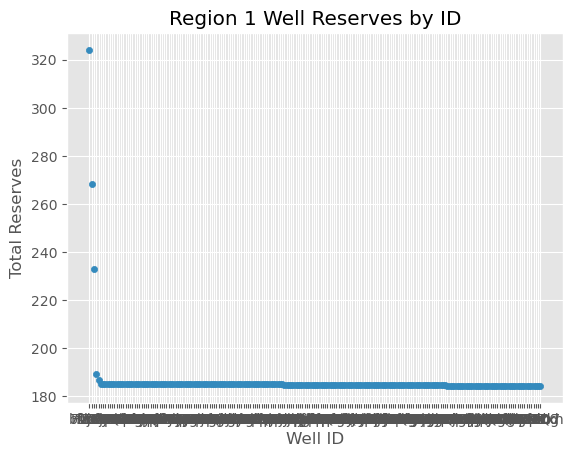

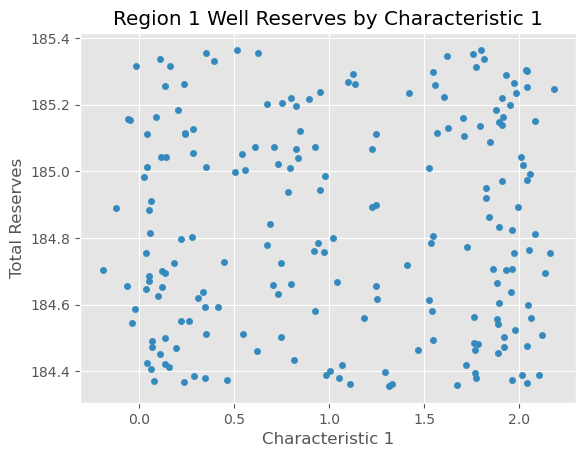

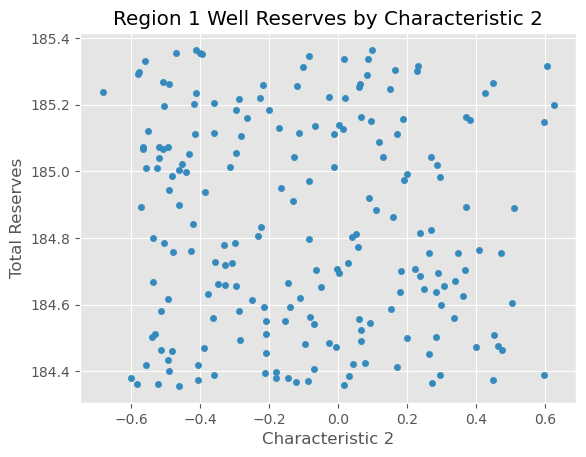

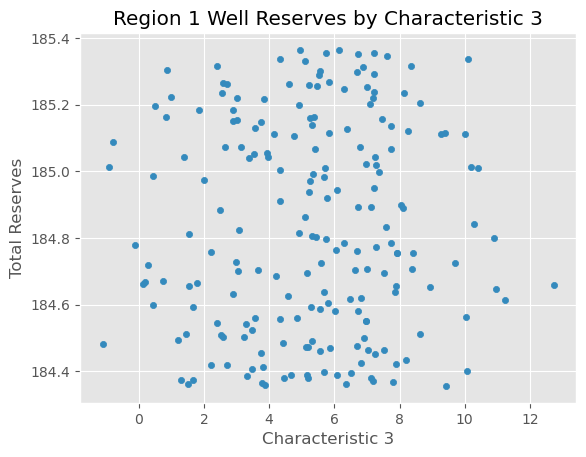

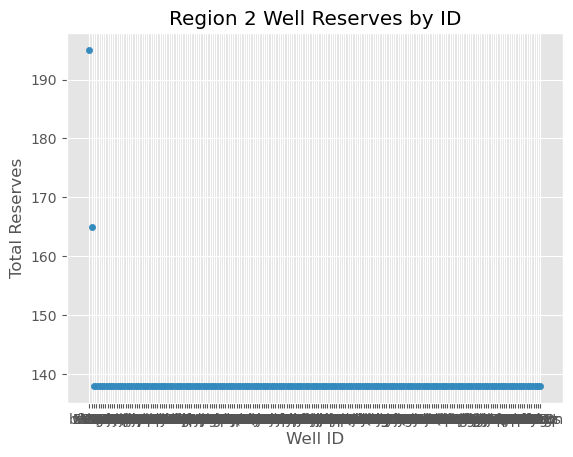

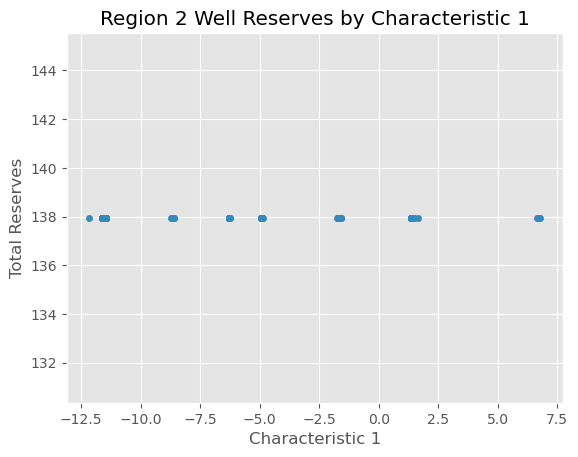

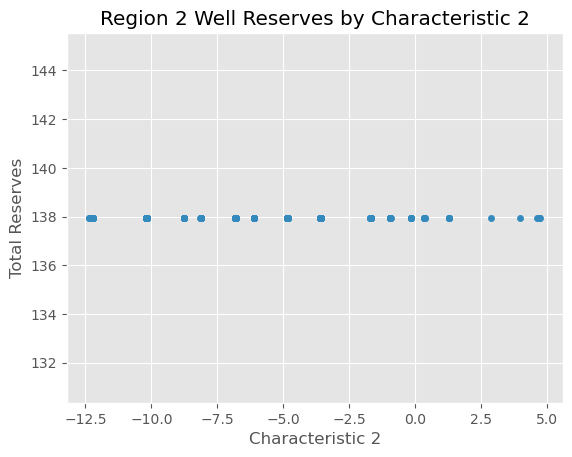

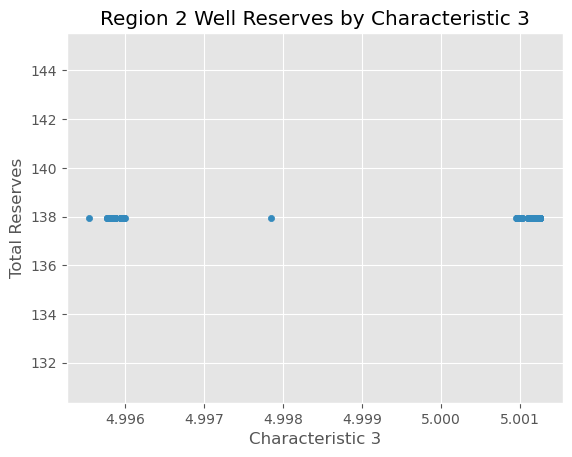

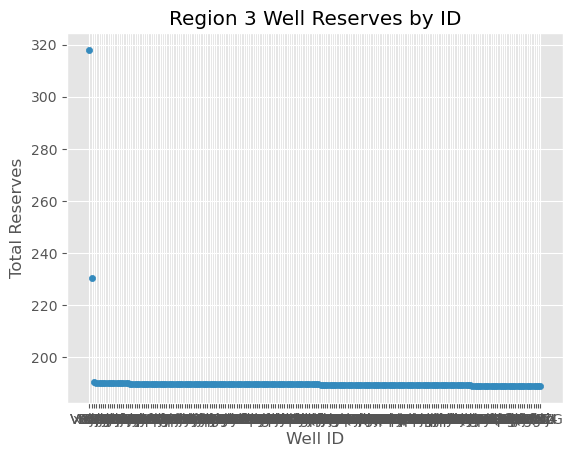

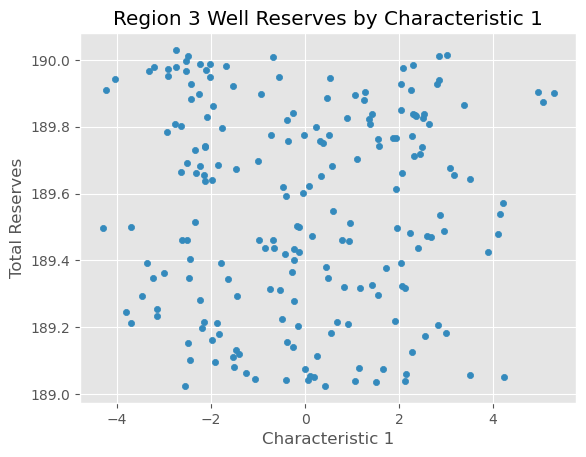

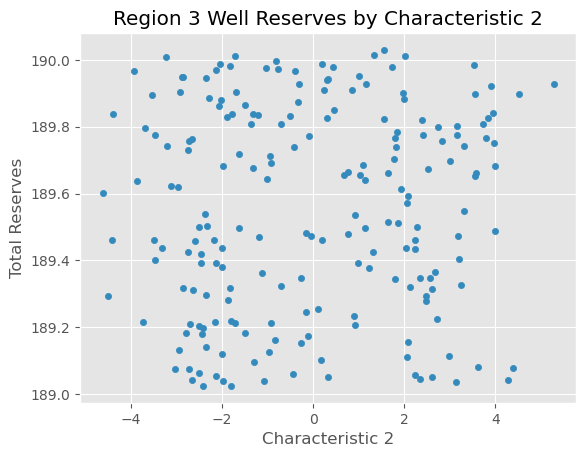

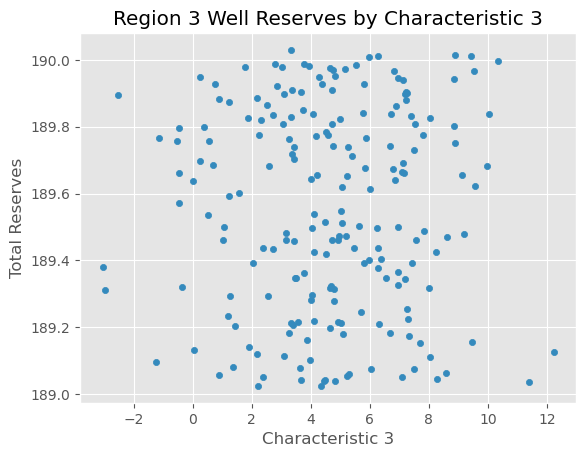

In [ ]:
plot(geo_data_0, 'id', 'Well ID', 'Region 1 Well Reserves by ID')
plot(geo_data_0, 'f0', 'Characteristic 1', 'Region 1 Well Reserves by Characteristic 1')
plot(geo_data_0, 'f1', 'Characteristic 2', 'Region 1 Well Reserves by Characteristic 2')
plot(geo_data_0, 'f2', 'Characteristic 3', 'Region 1 Well Reserves by Characteristic 3')

plot(geo_data_1, 'id', 'Well ID', 'Region 2 Well Reserves by ID')
plot(geo_data_1, 'f0', 'Characteristic 1', 'Region 2 Well Reserves by Characteristic 1')
plot(geo_data_1, 'f1', 'Characteristic 2', 'Region 2 Well Reserves by Characteristic 2')
plot(geo_data_1, 'f2', 'Characteristic 3', 'Region 2 Well Reserves by Characteristic 3')

plot(geo_data_2, 'id', 'Well ID', 'Region 3 Well Reserves by ID')
plot(geo_data_2, 'f0', 'Characteristic 1', 'Region 3 Well Reserves by Characteristic 1')
plot(geo_data_2, 'f1', 'Characteristic 2', 'Region 3 Well Reserves by Characteristic 2')
plot(geo_data_2, 'f2', 'Characteristic 3', 'Region 3 Well Reserves by Characteristic 3')

<h2>Data Modeling</h2>


This function will split, scale and create a model that can be used for all three dataframes

In [ ]:
#function to split, scale, and model data
def split_scale_model_data (data_train, data_valid, df, features_train, target_train, features_valid, target_valid, region):
    data_train, data_valid = train_test_split(df, test_size=0.25, train_size = 0.75, random_state=54321, shuffle=True)

    features_train = data_train.drop(['id', 'product'], axis=1)
    target_train = data_train['product']
    features_valid = data_valid.drop(['id', 'product'], axis=1)
    target_valid = data_valid['product']

    numeric = ['f0', 'f1', 'f2']
    scaler = StandardScaler()
    scaler.fit(features_train[numeric])
    features_train[numeric] = scaler.transform(features_train[numeric])
    features_valid[numeric] = scaler.transform(features_valid[numeric])
 
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)

    mean = predictions_valid.mean()


    result = mean_squared_error(target_valid, predictions_valid)**0.5
    print('RMSE of the linear regression model on the validation set for', region,':', result)
    print('The average volume of production of the linear regression model on the validation set for', region, 'is', mean, 'barrels')
    return predictions_valid, target_valid, features_valid



This code creates the necessary variables and calls the above function for all three dataframes. It seems that the second set of data is not as productive as the first and third, and the third dataframe is the most productive for its validation set; however, more work can be done to confirm this.

In [ ]:
geo0_train = pd.DataFrame()
geo1_train = pd.DataFrame()
geo2_train = pd.DataFrame()
geo0_valid = pd.DataFrame()
geo1_valid = pd.DataFrame()
geo2_valid = pd.DataFrame()
features0_train = pd.DataFrame()
features1_train = pd.DataFrame()
features2_train = pd.DataFrame()
target0_train = pd.DataFrame()
target1_train = pd.DataFrame()
target2_train = pd.DataFrame()
features0_valid = pd.DataFrame()
features1_valid = pd.DataFrame()
features2_valid = pd.DataFrame()
target0_valid = pd.DataFrame()
target1_valid = pd.DataFrame()
target2_valid = pd.DataFrame()

geo0_model = split_scale_model_data(geo0_train, geo0_valid, geo_data_0, features0_train, target0_train, features0_valid, target0_valid, 'Region 1')
geo1_model = split_scale_model_data(geo1_train, geo1_valid, geo_data_1, features1_train, target1_train, features1_valid, target1_valid, 'Region 2')
geo2_model = split_scale_model_data(geo2_train, geo2_valid, geo_data_2, features2_train, target2_train, features2_valid, target2_valid, 'Region 3')




RMSE of the linear regression model on the validation set for Region 1 : 37.68341093860808
The average volume of production of the linear regression model on the validation set for Region 1 is 92.15921155743655 barrels
RMSE of the linear regression model on the validation set for Region 2 : 0.8922819708481464
The average volume of production of the linear regression model on the validation set for Region 2 is 68.44594093153303 barrels
RMSE of the linear regression model on the validation set for Region 3 : 40.15250541784855
The average volume of production of the linear regression model on the validation set for Region 3 is 94.92229500787454 barrels


<h2>Calculating Profits</h2>


Variables for calculating profit

In [ ]:
total_budget = 100000000
total_points = 500
best_points = 200
unit_revenue = 4500
budget_per_well = total_budget / best_points
maximum_loss = 0.025
barrel_revenue = 4.5

This function calculates the reserves required to break even per well. It also calculates the average reserves of the each region as a whole, as well as the average reserves of just the top 200 wells in each region. It then compares the average reserves of the entire region to the breakeven point, and also the average reserves of the top 200 wells and provides commentary. It seems that region 3 has the highest average overall as well the highest average for its top 200 wells.

In [ ]:
def volume_reserve_comparison(df, region):

    min_volume = budget_per_well / unit_revenue
    print('A sufficient reserve would be', min_volume)

    total_avg_reserves = df['product'].mean()
    print('The average reserve for all of', region, 'is', total_avg_reserves)

    avg_reserves_top_200 = df['product'].sort_values(ascending=False).head(200).mean()
    print('The average reserve for the top 200 wells for', region, 'is', avg_reserves_top_200)

    if total_avg_reserves < min_volume and avg_reserves_top_200 < min_volume:
        print('There are not enough reserves in', region, 'to make a profit')
    elif total_avg_reserves < min_volume and avg_reserves_top_200 > min_volume:
        print('While taking into account the average of', region, 'there are not enough reserves in the average to make a profit; however, the average of the top 200 wells in the region is enough to make a profit')
    elif total_avg_reserves > min_volume and avg_reserves_top_200 > min_volume:
        print('There are enough reserves in', region, 'to make a profit')
    elif total_avg_reserves > min_volume and avg_reserves_top_200 < min_volume:
        print('While taking into account the average of', region, 'there are enough reserves in the average to make a profit; however, the average of the top 200 wells in the region is not enough to make a profit')
    else:
        print('The values of the averages are equal')
    
    return min_volume

    

In [ ]:
geo0_volume = volume_reserve_comparison(geo_data_0, 'Region 1')
geo1_volume = volume_reserve_comparison(geo_data_1, 'Region 2')
geo2_volume = volume_reserve_comparison(geo_data_2, 'Region 3')

A sufficient reserve would be 111.11111111111111
The average reserve for all of Region 1 is 92.49999999999974
The average reserve for the top 200 wells for Region 1 is 184.83373964536023
While taking into account the average of Region 1 there are not enough reserves in the average to make a profit; however, the average of the top 200 wells in the region is enough to make a profit
A sufficient reserve would be 111.11111111111111
The average reserve for all of Region 2 is 68.82500000002561
The average reserve for the top 200 wells for Region 2 is 137.94540774090612
While taking into account the average of Region 2 there are not enough reserves in the average to make a profit; however, the average of the top 200 wells in the region is enough to make a profit
A sufficient reserve would be 111.11111111111111
The average reserve for all of Region 3 is 95.00000000000041
The average reserve for the top 200 wells for Region 3 is 189.55147698176654
While taking into account the average of Region

This function calculates profit from the model prediction data's top 200 values by selecting the top 200 wells by volume in each region and then calculating profit. It also demonstrates the distribution of volume via boxplot for each region to provide a visualization of what is happening. It then provides commentary on whether or not the predicted average volume is enough to make a profit compared to the breakeven volume point. According to the predicted values, Region 1 would be the best choice to for Oily Giant to invest in.


In [ ]:
def selected_profit(geo_model, geo_volume, df, region):

    #variables
    prediction = geo_model
    breakeven_volume = geo_volume
    target_volume = df['product']
    column_name=['predicted_volume']

    #converting to a dataframe and sorting values
    prediction_data = pd.DataFrame(data=prediction, columns=column_name) 
    prediction_data = prediction_data.sort_values(by='predicted_volume', ascending=False)
    prediction_data = prediction_data.rename(columns={0: 'predicted_volume'})
    prediction_data.round(0)
    prediction_data['predicted_volume'] = prediction_data['predicted_volume'].astype('int')
    #prediction_data = prediction_data.reset_index()
    #prediction_data.drop(['index'], axis=1, inplace=True)

    #converting top 200 values to a dataframe
    top_prediction = prediction_data.head(200)
    top_prediction = top_prediction.rename(columns={0: 'predicted_volume'})
    #top_prediction = top_prediction.reset_index()
    #top_prediction.drop(['index'], axis=1, inplace=True)

    #calculating average volume
    top_prediction_mean = top_prediction['predicted_volume'].mean()

    #boxplot
    top_prediction.boxplot('predicted_volume', figsize=(12,7))
    
    #calculating profit
    target = target_volume[top_prediction.index].sum()

    profit = target * unit_revenue - budget_per_well

    #printing relevant values
    plt.show()
    print('The average of predicted volumes for the top 200 wells in', region, 'is' , top_prediction_mean)
    if top_prediction_mean > breakeven_volume:
        print('It is predicted that there are enough reserves in the top 200 wells of', region, 'to make a profit')
    elif top_prediction_mean < breakeven_volume:
        print('It is predicted that there are not enough reserves in the top 200 wells of', region, 'to make a profit')
    else:
        print('The values of the averages are equal')
    display(top_prediction.head())
    
    return prediction_data['predicted_volume']

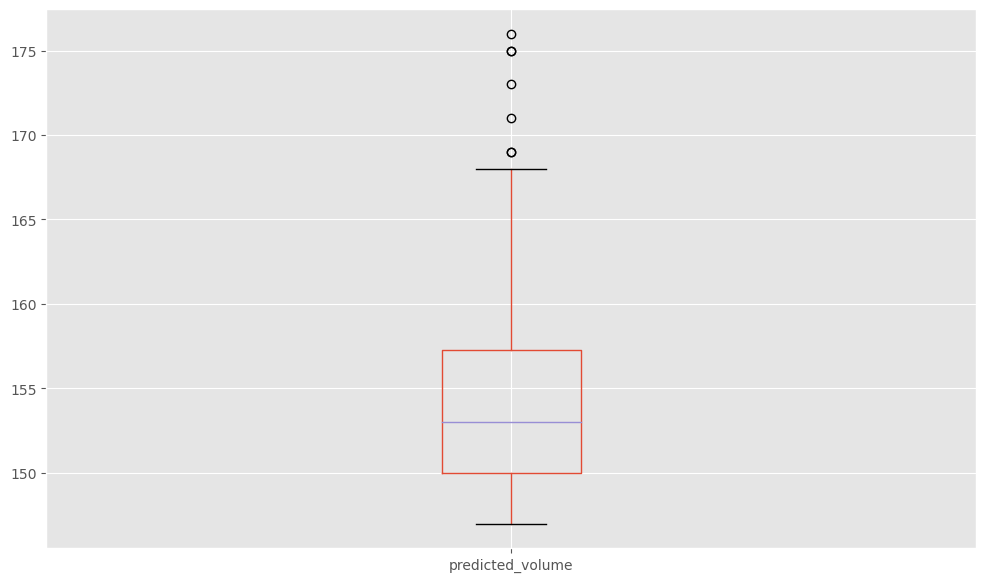

The average of predicted volumes for the top 200 wells in Region 1 is 154.295
It is predicted that there are enough reserves in the top 200 wells of Region 1 to make a profit


,predicted_volume,predicted_profit
0,176,292000.0
1,175,287500.0
2,175,287500.0
3,173,278500.0
4,171,269500.0


In [ ]:
selected_profit0 = selected_profit(geo0_model[0], geo0_volume, geo_data_0, 'Region 1')

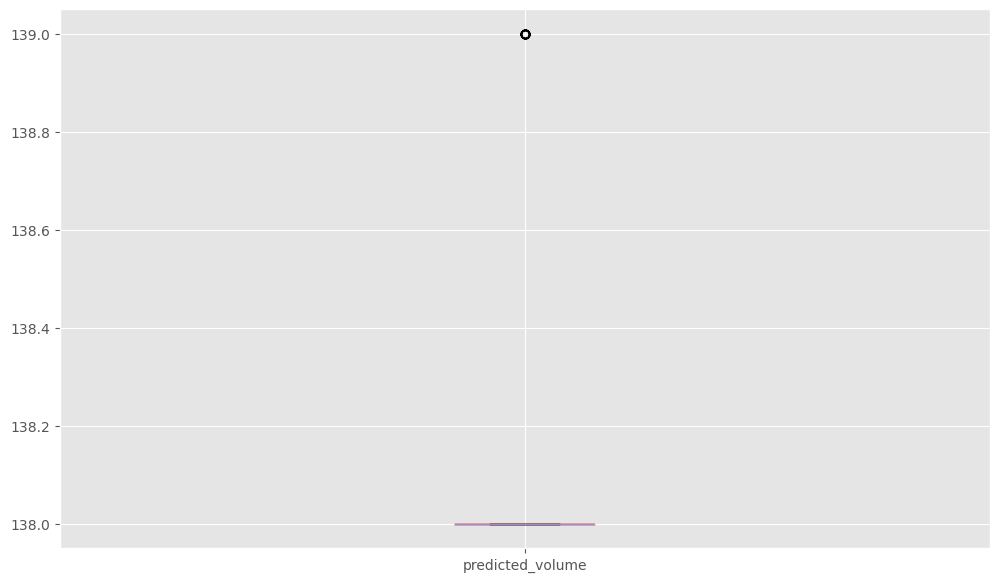

The average of predicted volumes for the top 200 wells in Region 2 is 138.135
It is predicted that there are enough reserves in the top 200 wells of Region 2 to make a profit


,predicted_volume,predicted_profit
0,139,125500.0
1,139,125500.0
2,139,125500.0
3,139,125500.0
4,139,125500.0


In [ ]:
selected_profit1 = selected_profit(geo1_model[0], geo1_volume, 'Region 2')

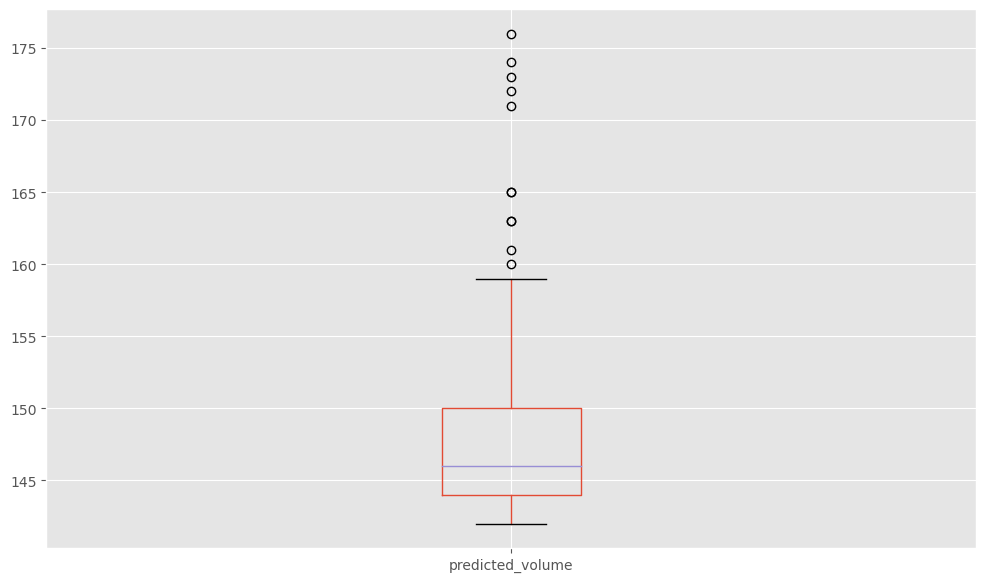

The average of predicted volumes for the top 200 wells in Region 3 is 148.065
It is predicted that there are enough reserves in the top 200 wells of Region 3 to make a profit


,predicted_volume,predicted_profit
0,176,292000.0
1,174,283000.0
2,173,278500.0
3,172,274000.0
4,171,269500.0


In [ ]:
selected_profit2 = selected_profit(geo2_model[0], geo2_volume, geo_data_2, 'Region 3')

This function attempts to calculate risk and profit for each region utilizing bootstrapping. I am not sure that it actually accomplishes this, unfortunately. If the findings are correct, I would recommend Region 2 as this region will maximize profit for Oily Giant.

In [ ]:
def bootstrap_profit(predicted, actual, titlename_1, titlename_2, region, iterations=1000, sample=500):
    predicted_series = pd.Series(predicted)
    predicted_series = predicted_series.reset_index(drop=True)
    actual = actual.reset_index(drop=True)
    state = np.random.RandomState(12345)
    values = []
    loss_count = 0
    
    for i in range(iterations):
        predicted_subsample = predicted_series.sample(n=sample, replace=True, random_state=state).sort_values(ascending=False)[:200]
        target = actual[predicted_subsample.index].sum()
        profit = target * unit_revenue - total_budget
        values.append(profit)
        if profit < 0:
            loss_count += 1

    values = pd.Series(values)

    values_df = pd.DataFrame(data=values, columns={'profit'})

    fig, axs = plt.subplots(1, 2, figsize=(15, 7))

    axs[0].hist(values,
                  bins=10
                 )
    axs[0].set_title(titlename_1)
    axs[0].set_ylabel('Frequency')
    
    axs[1].boxplot(values_df, whis=(5, 95))
    axs[1].set_title(titlename_2)

    profit_mean = values.sum() / iterations
    loss_risk = loss_count / iterations * 100
    
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    
    plt.show()
    print(lower)
    print(upper)
    print('The average profit for', region, 'is', profit_mean)
    print('The risk of loss for', region, 'is', loss_risk, '%')


    return

In [ ]:
bootstrap_profit(geo0_model[0], geo0_model[1], 'Distribution of Profit, Top 200 Wells in Region 1', 'Profit Boxplot, Top 200 Wells in Region 1', 'Region 1')

0        176
1        175
2        175
3        173
4        171
        ... 
24995     12
24996     11
24997      9
24998      4
24999    -10
Name: predicted_volume, Length: 25000, dtype: int64


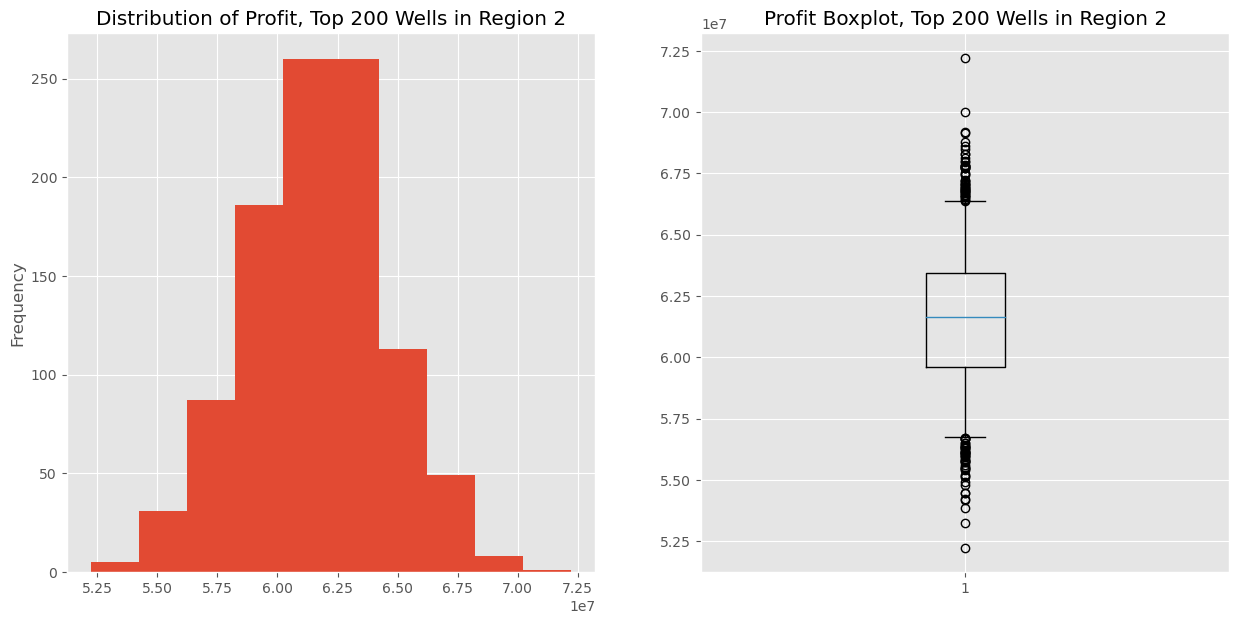

55980558.49159141
67184085.73826635
The average profit for Region 2 is 61600567.191986695
The risk of loss for Region 2 is 0.0


In [ ]:
bootstrap_profit(geo1_model[0], geo1_model[1], 'Distribution of Profit, Top 200 Wells in Region 2', 'Profit Boxplot, Top 200 Wells in Region 2', 'Region 2')

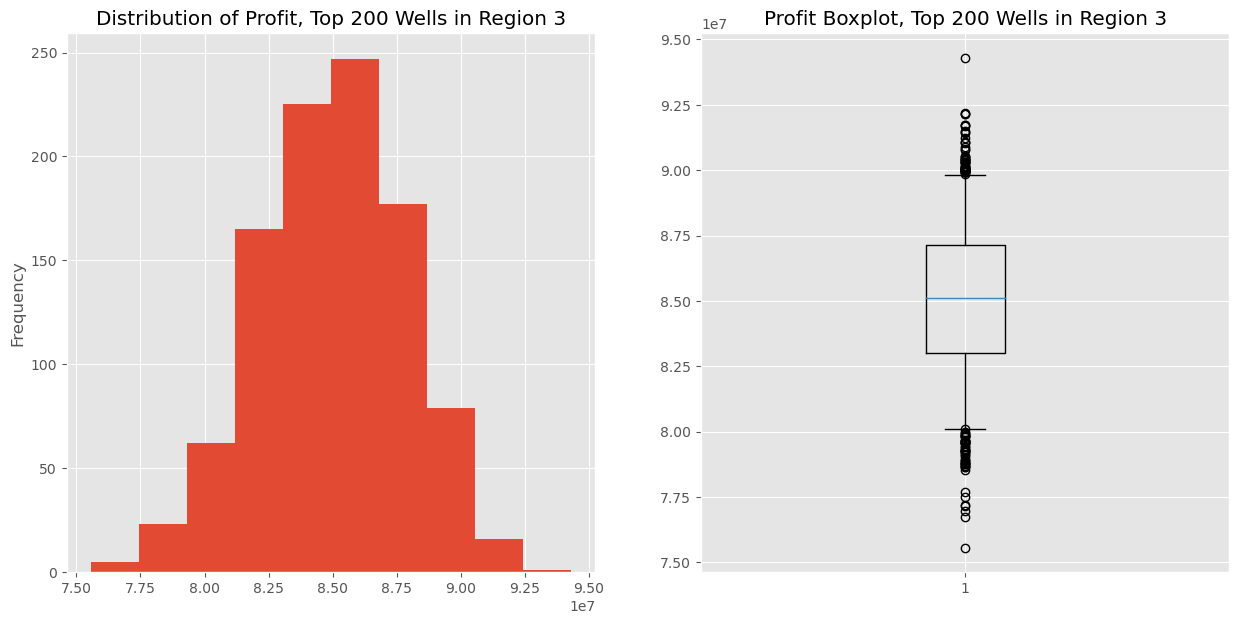

79263795.88102496
90330050.958226
The average profit for Region 3 is 85028288.11454007
The risk of loss for Region 3 is 0.0


In [ ]:
bootstrap_profit(geo2_model[0], geo2_model[1], 'Distribution of Profit, Top 200 Wells in Region 3', 'Profit Boxplot, Top 200 Wells in Region 3', 'Region 3')

<h1>Conclusion</h1>
Based on these findings, I would recommend that Oily Giant utilize Region 2 to place their new well. since after bootstrapping, Region 2 showed more consistent results at the expected confidence interval. Regions 1 and 3 initially showed more promise, but after bootstrapping, Region 2 was ultimately the best choice.